In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [28]:
# we passed this line of code to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loaded the dataset into panda
df = pd.read_csv('Immigration to Canada from 1980 to 2013.csv', low_memory=False)

# first four rows of the dataset
df.head()

,Unnamed: 0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [29]:
# Converted the column names to lower case

df.columns = [cols.lower() for cols in df.columns]

# printed out the column to check if it worked
df.head(n=0)

,unnamed: 0,type,coverage,odname,area,areaname,reg,regname,dev,devname,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


In [30]:
# we printed out the shape of the dataset to know how much data we are working with
print('There are',df.shape[1],'Columns and',df.shape[0],'rows in the dataset.')

There are 44 Columns and 195 rows in the dataset.


In [31]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unnamed: 0  195 non-null    int64 
 1   type        195 non-null    object
 2   coverage    195 non-null    object
 3   odname      195 non-null    object
 4   area        195 non-null    int64 
 5   areaname    195 non-null    object
 6   reg         195 non-null    int64 
 7   regname     195 non-null    object
 8   dev         195 non-null    int64 
 9   devname     195 non-null    object
 10  1980        195 non-null    int64 
 11  1981        195 non-null    int64 
 12  1982        195 non-null    int64 
 13  1983        195 non-null    int64 
 14  1984        195 non-null    int64 
 15  1985        195 non-null    int64 
 16  1986        195 non-null    int64 
 17  1987        195 non-null    int64 
 18  1988        195 non-null    int64 
 19  1989        195 non-null    int64 
 20  1990      

In [32]:
# We checked to see if there are null values
# It prints out the total amount
# The columns containing the null values

m = df.isna().sum().to_list()
r = sum(m)

if r == 0:
    print("No NaN values in the dataset.")
else:
    print(df.isna().values.sum(),"NaN values exists")
    print('This is a list of columns containing NaN values: \n',df.columns[df.isna().any()])

No NaN values in the dataset.


<Axes: xlabel='devname', ylabel='count'>

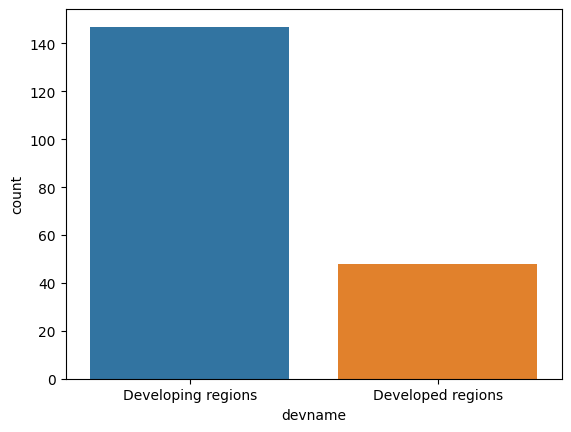

In [33]:
import seaborn as sns

sns.countplot(x='devname', data=df)

<Axes: xlabel='area', ylabel='count'>

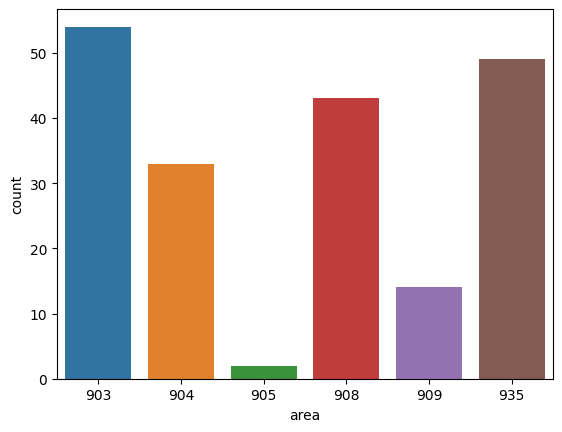

In [34]:
sns.countplot(x='area', data=df)

<Axes: xlabel='count', ylabel='dev'>

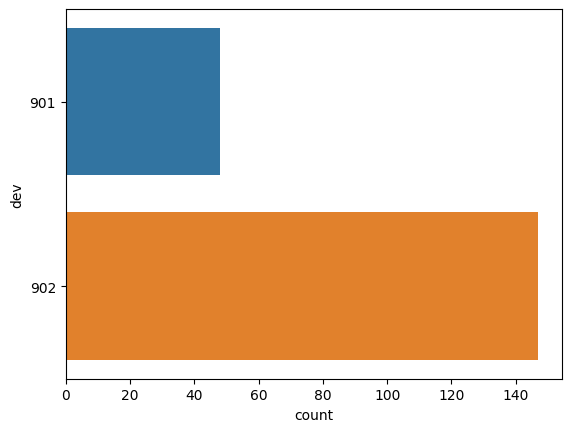

In [35]:
sns.countplot(y='dev', data=df)

LET US DROP COLOUMNS THATS ARE NO LONGER USEFUL FOR OUR ANALYSIS

In [36]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['unnamed: 0','area', 'reg', 'dev', 'type', 'coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'odname':'country', 'areaname':'continent','regname':'region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('country', inplace=True)

# add total column
df['total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

print('The column has been dropped, we now have', df.shape[1],'columns and', df.shape[0],'rows')

The column has been dropped, we now have 38 columns and 195 rows


/tmp/ipykernel_64609/2024366524.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total'] = df.sum(axis=1)


EXPLORATORY DATA ANALYSIS- EDA

In [37]:
# we get the sum of each year by continent
con = df.groupby('continent', axis=0).sum()
con.head()

/tmp/ipykernel_64609/1225053169.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  con = df.groupby('continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


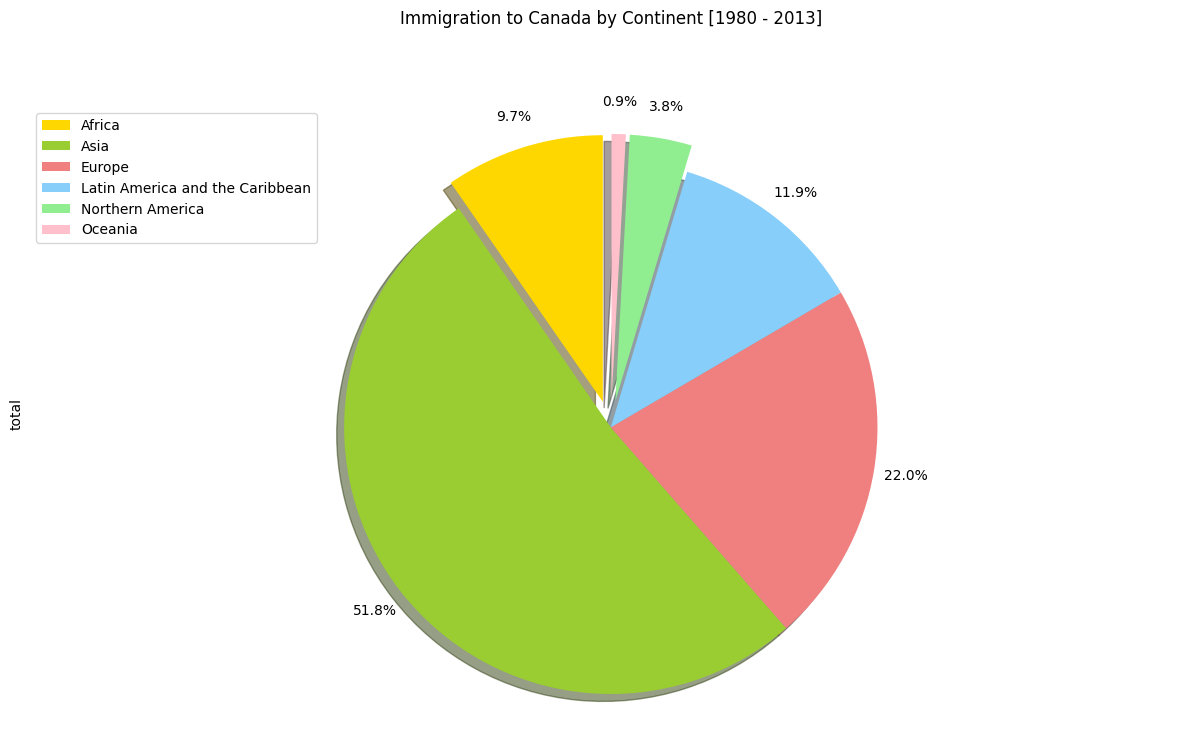

In [38]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

con['total'].plot(kind='pie', figsize=(15,8),
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None,       # remove labels on pie chart
                     pctdistance=1.12,  
                     colors=colors_list, 
                     explode=explode_list)  # explode lowest 3 continents

# scale the title by 12% to match the pct distance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels=con.index, loc='upper left')

plt.show()

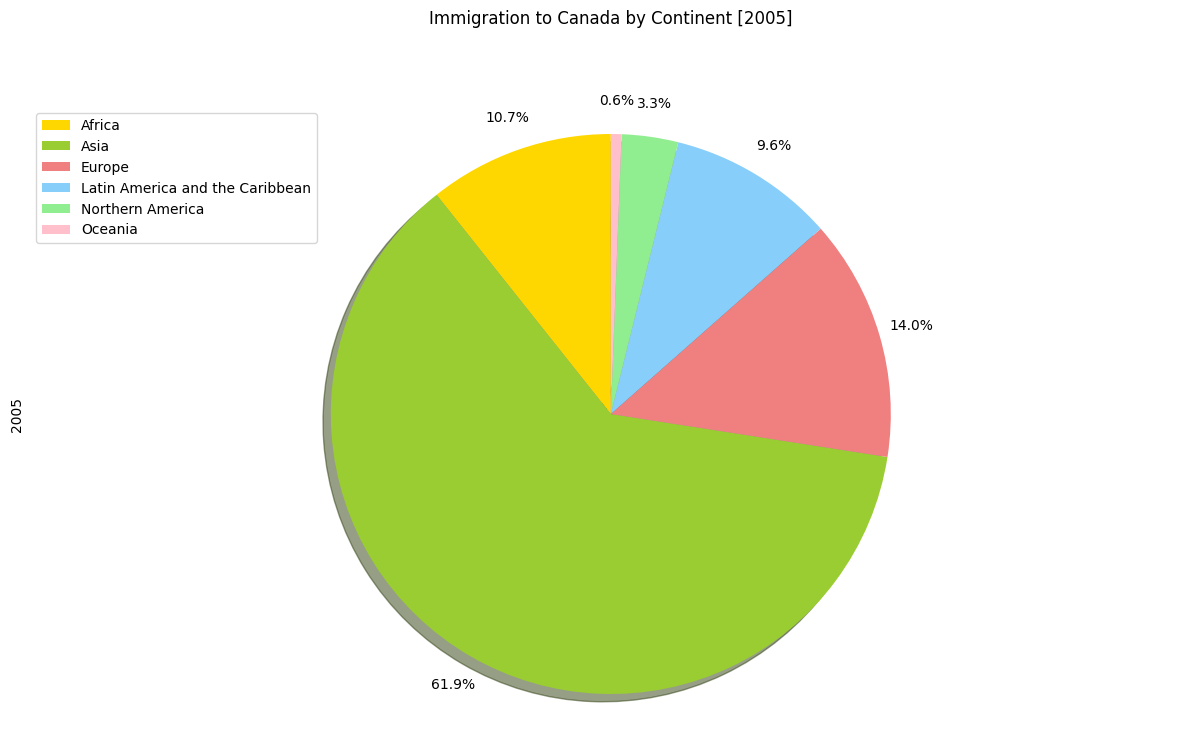

In [39]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

con['2005'].plot(kind='pie', figsize=(15,8),
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None,       # remove labels on pie chart
                     pctdistance=1.12,  
                     colors=colors_list)

# scale the title by 12% to match the pct distance
plt.title('Immigration to Canada by Continent [2005]', y=1.12)

plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels=con.index, loc='upper left')

plt.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the some country immigrants between 1980 - 2013.


Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [40]:

df_china = df.loc[['China', 'India'], years].transpose()
df_china.head()

country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [43]:
df_china.describe()

country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


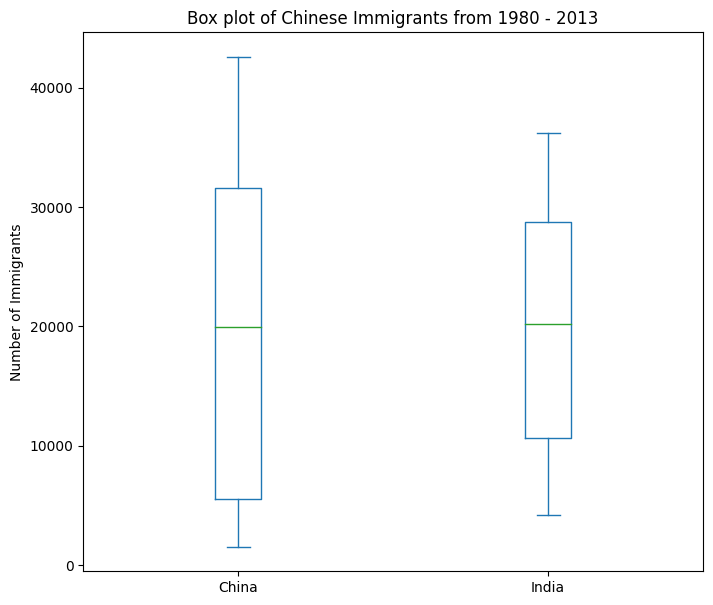

In [41]:
df_china.plot(kind='box', figsize=(8,7))
plt.title('Box plot of Chinese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

SUBPLOTS

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.


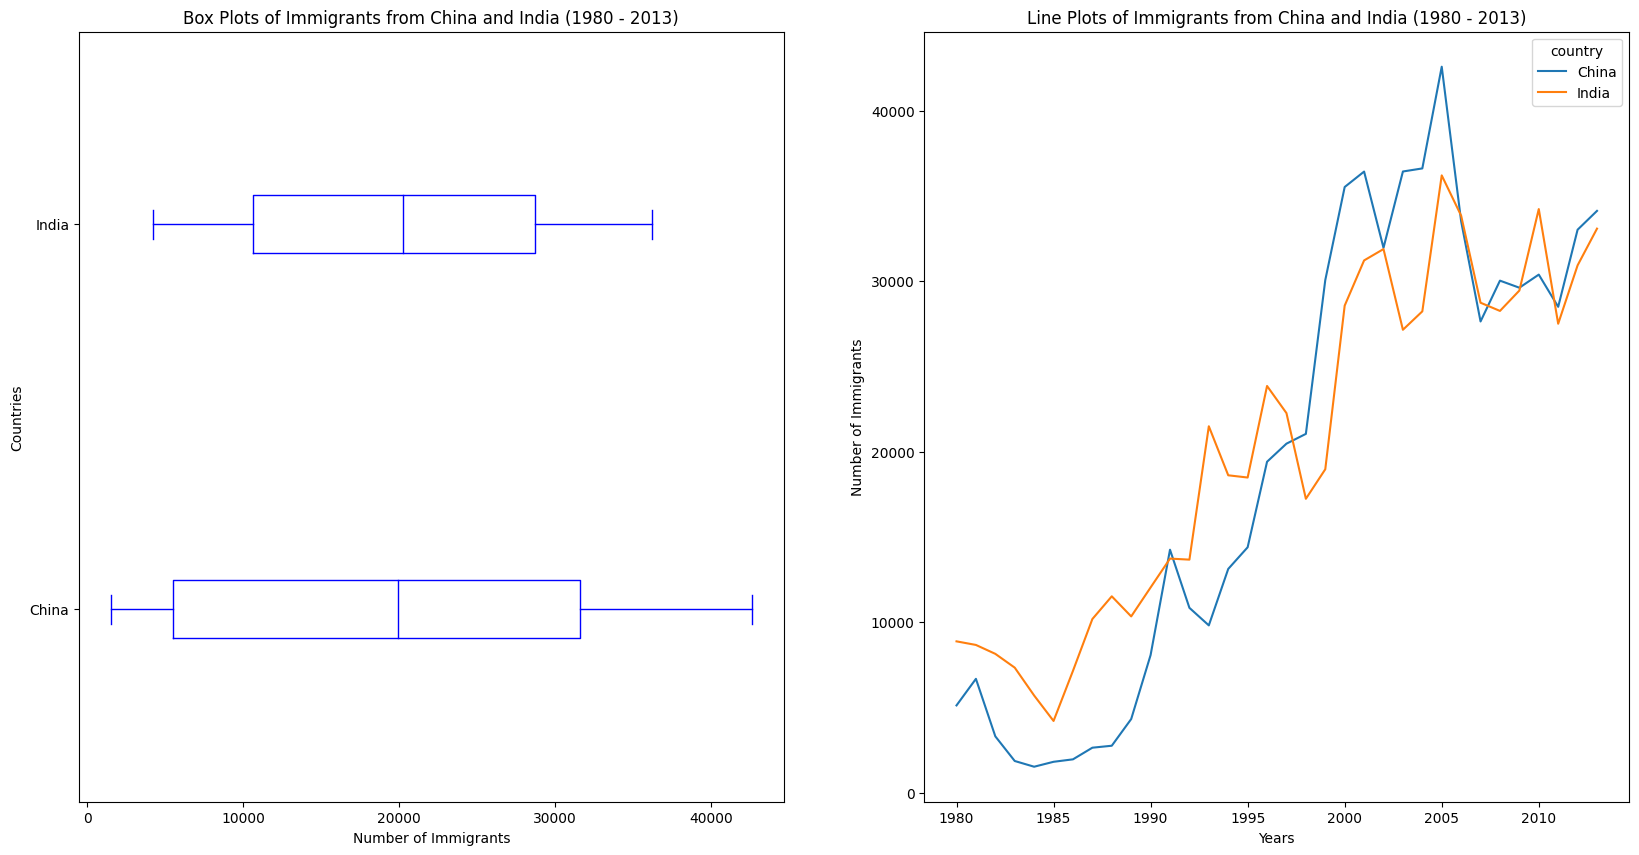

In [46]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

#Subplot 1
df_china.plot(kind='box', figsize=(20,10), color='blue', vert=False, ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2
df_china.plot(kind='line', figsize=(20,10), ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [49]:
# 
df_top15 = df.sort_values(['total'], ascending=False, axis=0).head(15)
df_top15

,continent,region,devname,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [54]:
# we define the years into 3 of its decade
years80 = list(map(str, range(1980,1990)))
years90 = list(map(str, range(1990,2000)))
years00 = list(map(str, range (2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years80].sum(axis=1) 
df_90s = df_top15.loc[:, years90].sum(axis=1) 
df_00s = df_top15.loc[:, years00].sum(axis=1)

    # merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # display dataframe
new_df.head(15)

,1980s,1990s,2000s
country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


In [55]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


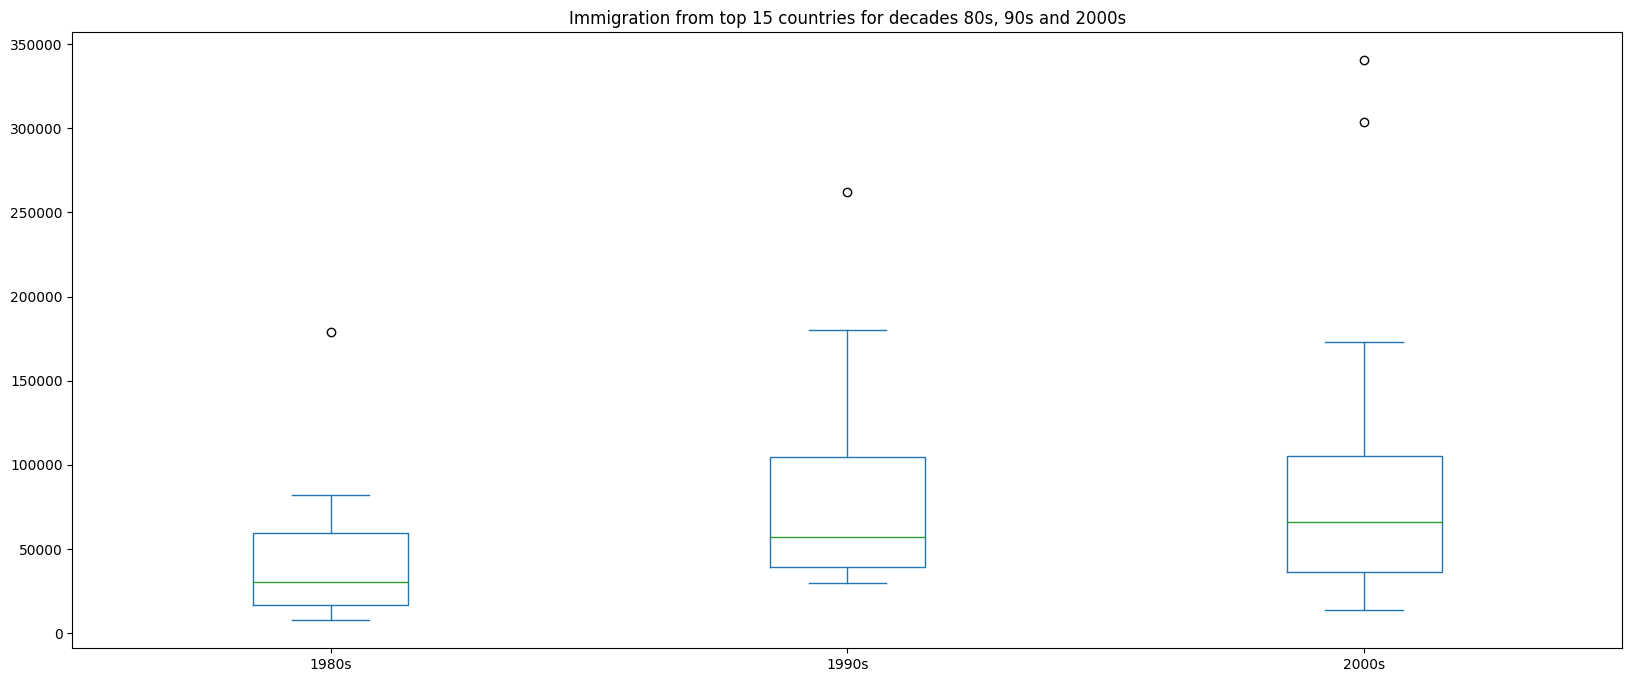

In [56]:
new_df.plot(kind = 'box', figsize = (20,8))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()